Memasukan library yang digunakan : 

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt

Pemanggilan Data Dan Mengambil variabel independen dan dependen dan menyiapkan array prediksi

In [7]:
file_path = 'Produksi002.csv'  # Sesuaikan nama file
data = pd.read_csv(file_path)

kabupaten_data = data[data['Kabupaten'].str.contains("Sulawesi Barat", case=False)]
kakao_data = kabupaten_data[kabupaten_data['Jenis'] == 'Kakao']

kabupaten_tahun = ['2015', '2016', '2018', '2020', '2021']
tahun_prediksi = [2020,2021,2022, 2023, 2024, 2025, 2026]

years = np.array([int(year) for year in kabupaten_tahun]).reshape(-1, 1)
production = kakao_data[kabupaten_tahun].values.flatten()


Pembuatan Model Regresi linear

In [8]:
model = LinearRegression()
model.fit(years, production)

tahun_prediksi_array = np.array(tahun_prediksi).reshape(-1, 1)
future_predictions = model.predict(tahun_prediksi_array)

Perhitungan Nilai Evaluasi

In [9]:
r2 = r2_score(production, model.predict(years))
mae = mean_absolute_error(production, model.predict(years))
rmse = np.sqrt(mean_squared_error(production, model.predict(years)))

print("Evaluasi untuk Kakao:")
print(f"R2: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}\n")

Evaluasi untuk Kakao:
R2: 0.6916
MAE: 2321.56
RMSE: 3128.36



Visualiasasi Hasil Prediksi

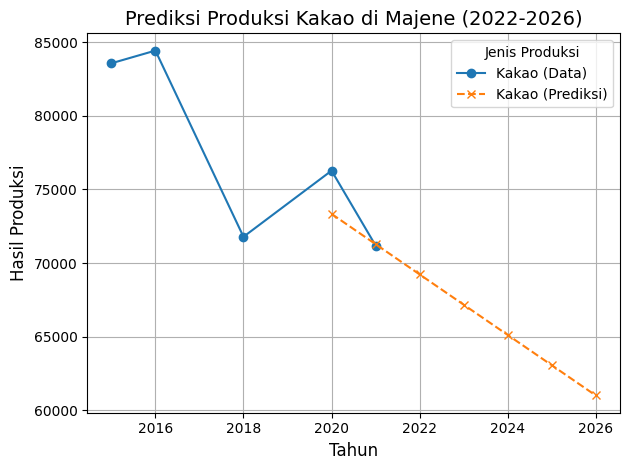

Prediksi Kakao untuk tahun 2022-2026:
Tahun 2020: 73341.46
Tahun 2021: 71286.83
Tahun 2022: 69232.20
Tahun 2023: 67177.56
Tahun 2024: 65122.93
Tahun 2025: 63068.30
Tahun 2026: 61013.67


In [10]:
plt.plot(years.flatten(), production, marker='o', label='Kakao (Data)')
plt.plot(tahun_prediksi, future_predictions, marker='x', linestyle='--', label='Kakao (Prediksi)')

plt.title('Prediksi Produksi Kakao di Majene (2022-2026)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Hasil Produksi', fontsize=12)
plt.legend(title='Jenis Produksi')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Prediksi Kakao untuk tahun 2022-2026:")
for year, pred in zip(tahun_prediksi, future_predictions):
    print(f"Tahun {year}: {pred:.2f}")
